In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
df = data.copy()

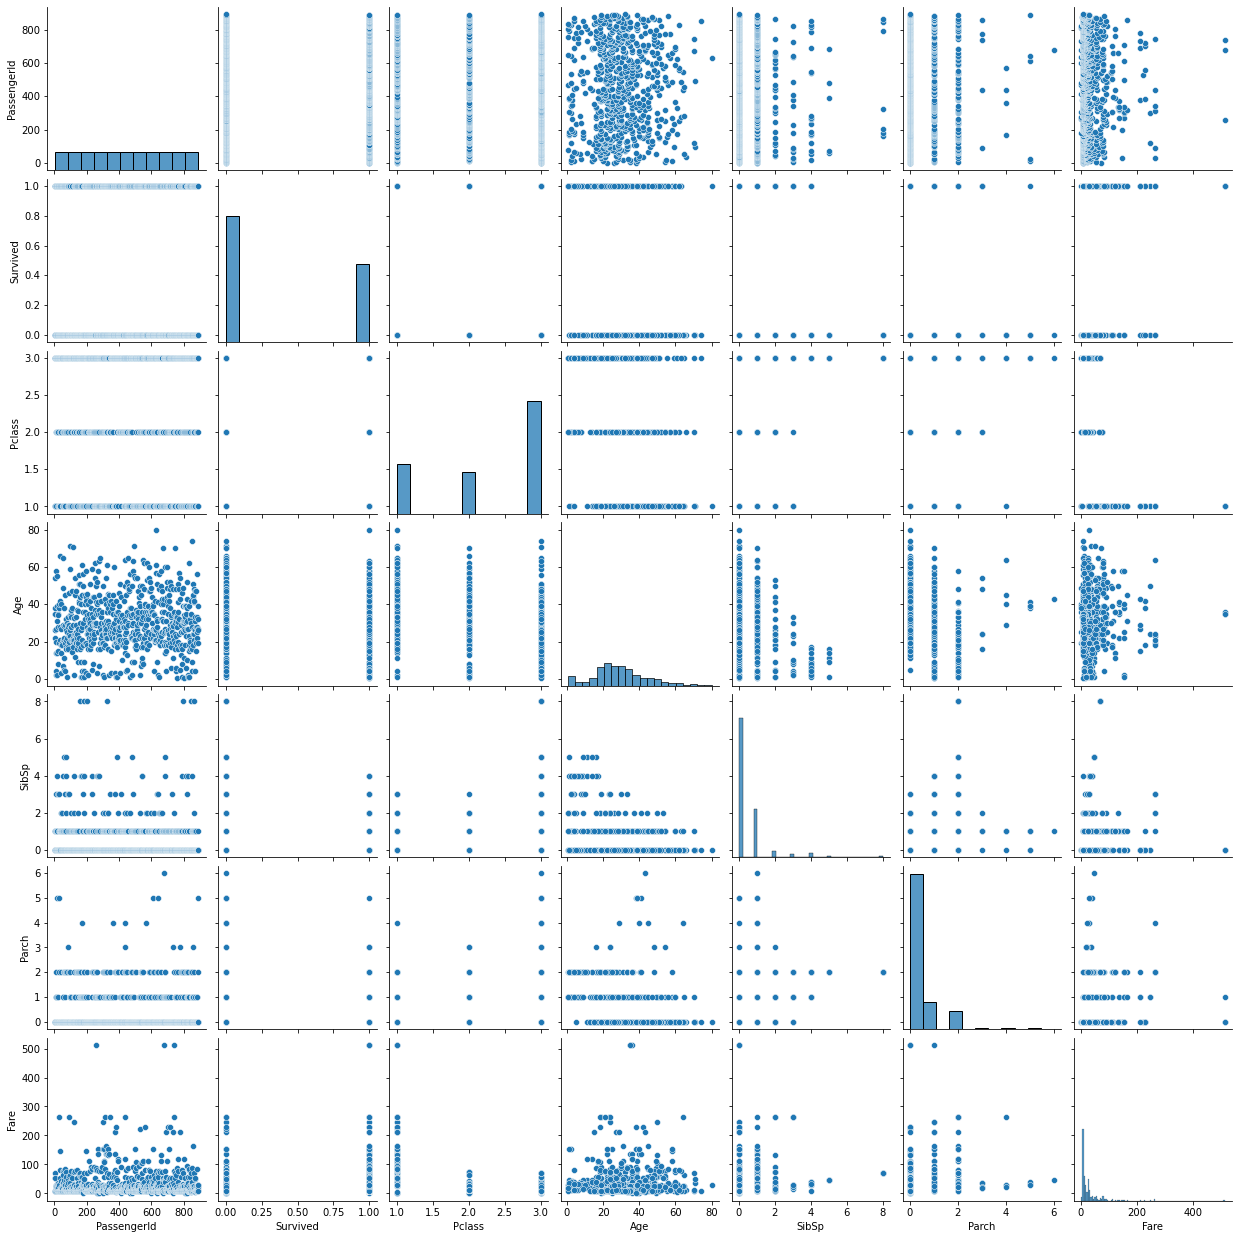

In [5]:
# Visualisation global du dataset

sns.pairplot(df)

<AxesSubplot:>

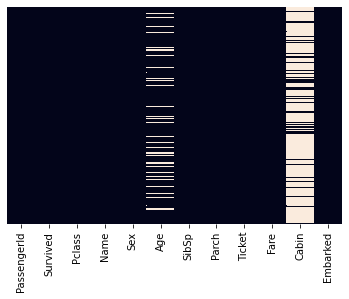

In [6]:
# Visualisation des valeurs manquantes

sns.heatmap(df.isnull() , yticklabels=False , cbar = False)

In [7]:
# Pourcentage de valeur manquante par variable
(df.isna().sum() / df.shape[0]).sort_values()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

In [8]:
# Elimination de la colonne cabine car elle contient beaucoup de valeur manquantes

df.drop(['Cabin'],axis=1,inplace=True)

In [9]:
# On remplace les valeurs manquantes de Age par la médiane des ages

df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
# On remplace les valeurs manquantes de Embarked par les valeurs les plus fréquentes

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
(df.isna().sum() / df.shape[0]).sort_values()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Il n'y a plus de valeurs manquantes dans notre dataset

<AxesSubplot:>

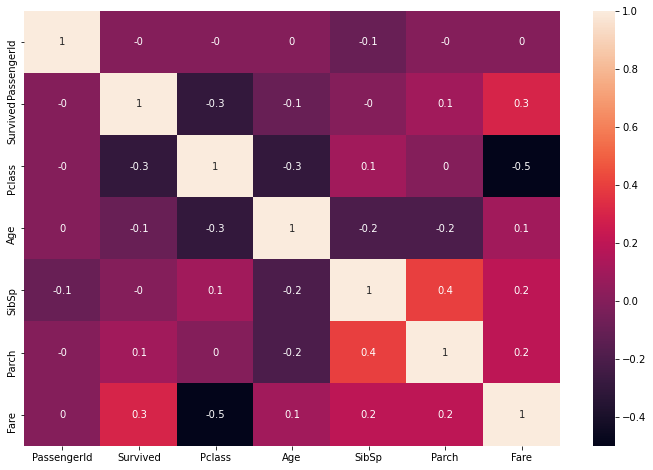

In [12]:
# Visualisation de la matrice de corrélation

plt.figure(figsize=(12,8))
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr , annot=True)

Les variables qui ont le plus d'influence sur notre variable target sont :

- Fare
- Parch
- Age
- Pclass

# Analyse Univarié

In [13]:
df['Survived'].value_counts(normalize=True)*100

# Il y'a un léger déséquilibre entre les deux classes --> il faudra peut être faire un sur-échantillonage pour régler ce probléme

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [14]:
df.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

In [15]:
# Les variables catégoriques
var_cat = []

for col in df.select_dtypes('object'):
    var_cat.append(col)

In [16]:
# Les variables numériques

var_num  = []

for col in df.select_dtypes('float'):
    var_num.append(col)
    
for col in df.select_dtypes('int'):
    var_num.append(col)

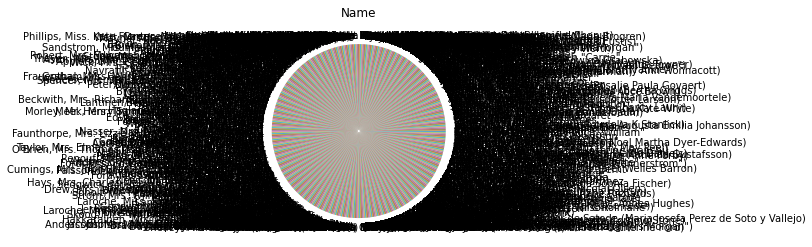

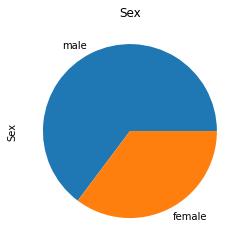

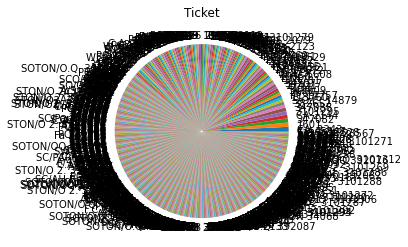

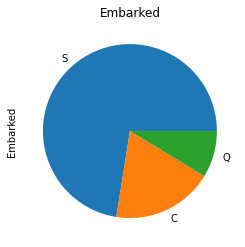

In [17]:
# Visualisation de toute les variables catégoriques

for col in var_cat:
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)

Nous pouvons remarquer que:
- Il y'a beaucoup plus d'homme que de femmes à bord 
- La majorité des passagers ont embarqué de la porte S

In [18]:
def nameTransfo(df):
    split = df['Name'].str.split('.')

    i = 1
    for j in df.index:
        while split[j][0][-i] != " ":
            i+=1
        df['Name'][j] = split[j][0][-i+1:]
        i = 1

    return df

In [19]:
df = nameTransfo(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,S


In [20]:
# Dans ce dataset 0 veut dire que le passager n'a pas survécu et 1 veut dire qu'il a survécu

survi_df = df[df['Survived'] == 1] 
non_survi_df = df[df['Survived'] == 0] 

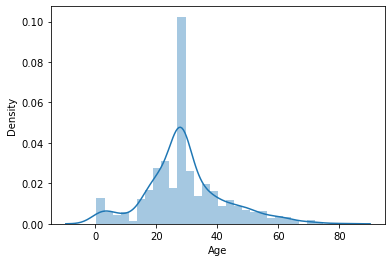

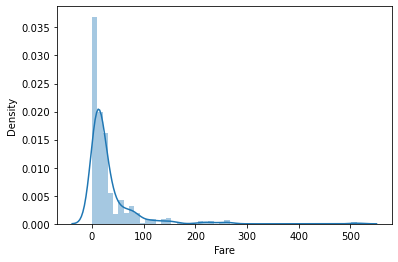

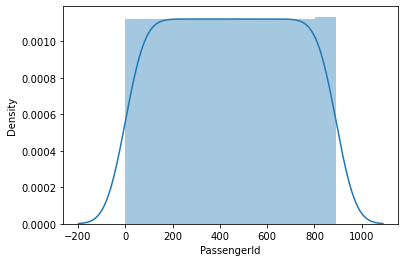

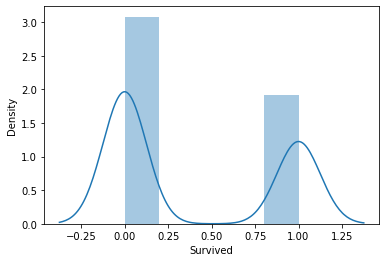

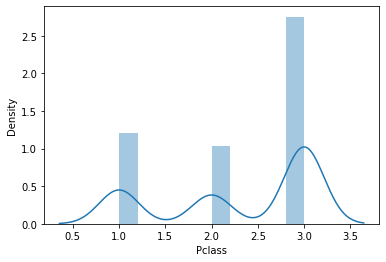

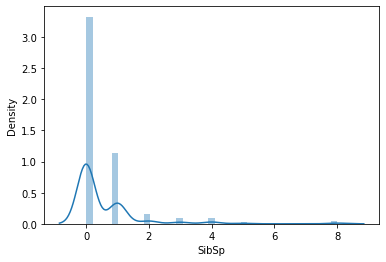

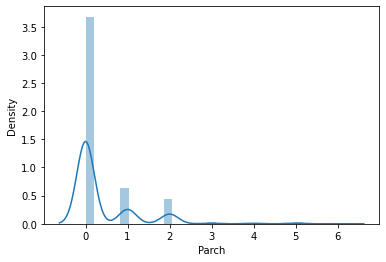

In [21]:
for col in var_num:
    plt.figure()
    sns.distplot(df[col])

- La majorité des passagers voyagait sans leur proche
- La majorité des passagers voyageait en 3eme classe
- La majorité des personnes avait entre 0 et 100 dollars
- La majorité des personnnes avait entre 20 et 40 ans

# Analyse Bivarié 

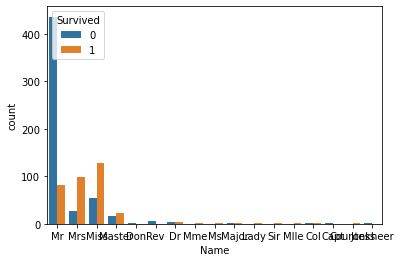

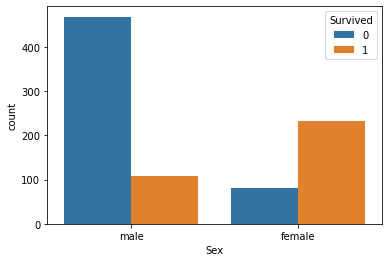

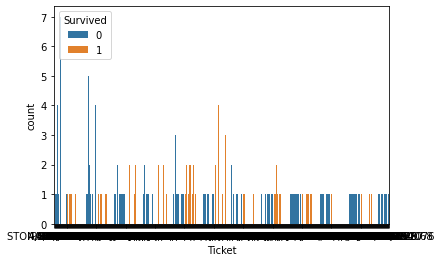

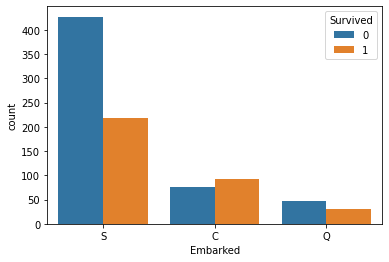

In [22]:
# Visualisation des relations entre les variables catégoriques et la target

for col in var_cat:
    plt.figure()
    sns.countplot(x=col , data=df , hue='Survived')

Nous pouvons remarquer que :
- Les femmes ont beaucoup plus de chances de survivre que les hommes
- Les passagers qui embarquent à la porte C ont ceux qui ont le plus de chance de survivre

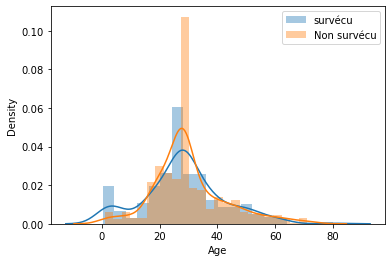

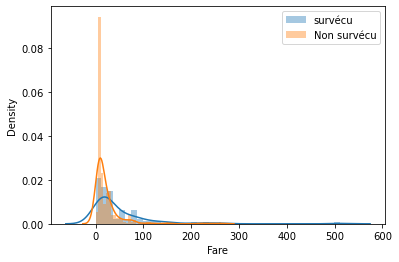

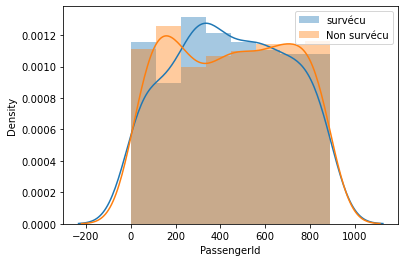

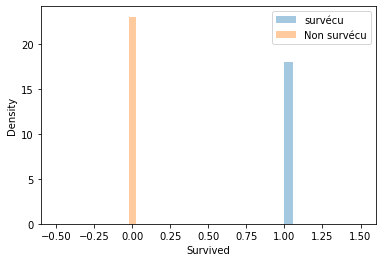

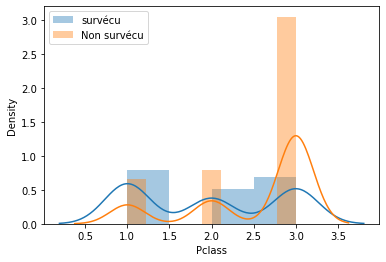

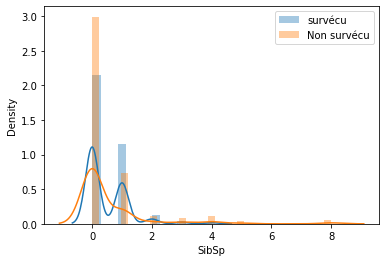

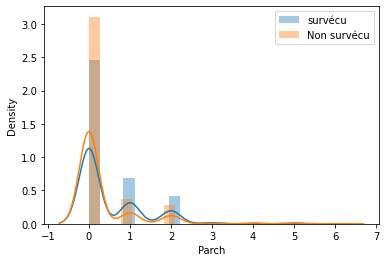

In [23]:
# Visualisation des relations entre les variables continue et la target

for col in var_num:
    plt.figure()
    sns.distplot(survi_df[col] , label='survécu')
    sns.distplot(non_survi_df[col] , label = 'Non survécu')
    plt.legend()

Nous pouvons remarquer que :
- Plus un passager est riche , plus ses chances de survi augmente
- Les passagers de la classe 1 et 2 ont beaucoup plus de chance de survie que les passagers de classe 3
- Plus il y'a le passagers a de la famille avec lui , plus ces chances de survi augmentent

# Encodage des données

In [24]:
df_cat = df[var_cat]
df_cat

,Name,Sex,Ticket,Embarked
0,Mr,male,A/5 21171,S
1,Mrs,female,PC 17599,C
2,Miss,female,STON/O2. 3101282,S
3,Mrs,female,113803,S
4,Mr,male,373450,S
...,...,...,...,...
886,Rev,male,211536,S
887,Miss,female,112053,S
888,Miss,female,W./C. 6607,S
889,Mr,male,111369,C


In [70]:
df_num = df[var_num]
df_num

,Age,Fare,PassengerId,Survived,Pclass,SibSp,Parch
0,22.0,7.2500,1,0,3,1,0
1,38.0,71.2833,2,1,1,1,0
2,26.0,7.9250,3,1,3,0,0
3,35.0,53.1000,4,1,1,1,0
4,35.0,8.0500,5,0,3,0,0
...,...,...,...,...,...,...,...
886,27.0,13.0000,887,0,2,0,0
887,19.0,30.0000,888,1,1,0,0
888,28.0,23.4500,889,0,3,1,2
889,26.0,30.0000,890,1,1,0,0


In [71]:
df_cat = pd.get_dummies(df_cat , drop_first=True)
df_cat

,Name_Col,Name_Countess,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Concaténer les deux dataframe
df_encoded = pd.concat([df_cat , df_num] , axis=1)
df_encoded

,Name_Col,Name_Countess,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,...,Ticket_WE/P 5735,Embarked_Q,Embarked_S,Age,Fare,PassengerId,Survived,Pclass,SibSp,Parch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,22.0,7.2500,1,0,3,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,38.0,71.2833,2,1,1,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,26.0,7.9250,3,1,3,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,35.0,53.1000,4,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,35.0,8.0500,5,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,1,27.0,13.0000,887,0,2,0,0
887,0,0,0,0,0,0,0,0,1,0,...,0,0,1,19.0,30.0000,888,1,1,0,0
888,0,0,0,0,0,0,0,0,1,0,...,0,0,1,28.0,23.4500,889,0,3,1,2
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,26.0,30.0000,890,1,1,0,0


In [73]:
X = df_encoded.drop(['Survived'],axis=1)
y = df_encoded['Survived']

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [76]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)

In [77]:
np.random.seed(5)

model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.8603351955307262

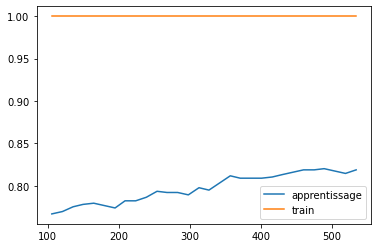

In [78]:
from sklearn.model_selection import learning_curve
N , train_score , val_score = learning_curve(model , X_train , y_train , train_sizes=np.linspace(0.2,1.0,30) , cv=4)

plt.plot(N , val_score.mean(axis=1) , label = 'apprentissage')
plt.plot(N , train_score.mean(axis=1) , label = 'train')
plt.legend()

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3).mean()

0.822968005767708

In [94]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
257    1
4      0
488    0
651    1
512    1
      ..
32     1
792    0
733    0
706    1
802    1
Name: Survived, Length: 179, dtype: int64


# Test

In [57]:
test = pd.read_csv('test.csv')

In [61]:
test.drop(['Cabin'],axis=1,inplace=True)

In [62]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [92]:
test = nameTransfo(test)

IndexError: string index out of range

In [63]:
test_cat = test[var_cat]

In [82]:
var_num2 = []

for element in var_num:
    if element != 'Survived':
        var_num2.append(element)
var_num2

['Age', 'Fare', 'PassengerId', 'Pclass', 'SibSp', 'Parch']

In [83]:
test_num = test[var_num2]

In [84]:
test_cat = pd.get_dummies(test_cat , drop_first=True)

In [85]:
test_encoded = pd.concat([test_cat , test_num] , axis=1)

In [96]:
test_encoded

,"Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Name_Aks, Master. Philip Frank","Name_Aldworth, Mr. Charles Augustus","Name_Allison, Mr. Hudson Joshua Creighton","Name_Andersen, Mr. Albert Karvin","Name_Andersson, Miss. Ida Augusta Margareta","Name_Andersson, Mr. Johan Samuel",...,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Embarked_Q,Embarked_S,Age,Fare,PassengerId,Pclass,SibSp,Parch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,34.5,7.8292,892,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,47.0,7.0000,893,3,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,62.0,9.6875,894,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,27.0,8.6625,895,3,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,22.0,12.2875,896,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,27.0,8.0500,1305,3,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,39.0,108.9000,1306,1,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,38.5,7.2500,1307,3,0,0
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,27.0,8.0500,1308,3,0,0


In [90]:
test_ids = []

passid = 892

for i in range(418):
    test_ids.append(passid)
    passid += 1
len(test_ids)

418

In [95]:
submission_preds = model.predict(test_encoded)

ValueError: X has 788 features, but StandardScaler is expecting 705 features as input.